In [105]:
# LOADING THE REQUIRED LIBRARIES
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source("tests.R")
source('cleanup.R')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ ggplot2 3.5.1     ✔ tibble  3.2.1
✔ purrr   1.0.2     ✔ tidyr   1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ stringr::fixed() masks recipes::fixed()
✖ dplyr::ident()   masks dbplyr::ident()
✖ dplyr::lag()     masks stats::lag()
✖ readr::spec()    masks yardstick::spec()
✖ dplyr::sql()     masks dbplyr::sql()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ dials        1.3.0     ✔ workflowsets 1.0.1
✔ modeldata    1.4.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ stringr::fixed()  masks recipes::fixed()
✖ dplyr::ident()    masks dbplyr::ident()
✖ dplyr::lag()

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [106]:
# LOADING REQUIRED CSV FILES FOR ANALYSIS
player_data <- read_csv("data/players.csv") 
sessions_data <- read_csv("data/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [107]:
# CHECKING FOR POTENTIAL HEADER ISSUES
colnames(player_data)
colnames(sessions_data)

# RECOGNIZED THAT CLEAN_NAMES() IS NOT NEEDED

sessions_clean <- sessions_data |> 
        filter(!is.na(start_time), !is.na(end_time))

[1] "experience"   "subscribe"    "hashedEmail"  "played_hours" "name"        
[6] "gender"       "Age"

[1] "hashedEmail"         "start_time"          "end_time"           
[4] "original_start_time" "original_end_time"

In [124]:
#Seperating start and end time

# Step 2: Separate start time into date/hour/min
sessions <- sessions_data |>
  separate(start_time, into = c("start_date", "start_clock"), sep = " ") |>
  separate(start_clock, into = c("start_hr", "start_min"), sep = ":") |>
  separate(end_time, into = c("end_date", "end_clock"), sep = " ") |>
  separate(end_clock, into = c("end_hr", "end_min"), sep = ":")

# Step 4: Convert hours to numeric
sessions <- sessions |>
  mutate(
    start_hour = as.numeric(start_hr),
    end_hour = as.numeric(end_hr)
  )
sessions

hashedEmail,start_date,start_hr,start_min,end_date,end_hr,end_min,original_start_time,original_end_time,start_hour,end_hour
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18,12,30/06/2024,18,24,1.71977e+12,1.71977e+12,18,18
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23,33,17/06/2024,23,46,1.71867e+12,1.71867e+12,23,23
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17,34,25/07/2024,17,57,1.72193e+12,1.72193e+12,17,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024,15,36,28/07/2024,15,57,1.72218e+12,1.72218e+12,15,15
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024,06,15,25/07/2024,06,22,1.72189e+12,1.72189e+12,6,6
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024,02,26,20/05/2024,02,45,1.71617e+12,1.71617e+12,2,2


In [128]:
# To account for N/A values 
sessions_clean <- sessions |>
  filter(start_hour != "NA" & end_hour != "NA")
sessions_clean

hashedEmail,start_date,start_hr,start_min,end_date,end_hr,end_min,original_start_time,original_end_time,start_hour,end_hour
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18,12,30/06/2024,18,24,1.71977e+12,1.71977e+12,18,18
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23,33,17/06/2024,23,46,1.71867e+12,1.71867e+12,23,23
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17,34,25/07/2024,17,57,1.72193e+12,1.72193e+12,17,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024,15,36,28/07/2024,15,57,1.72218e+12,1.72218e+12,15,15
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024,06,15,25/07/2024,06,22,1.72189e+12,1.72189e+12,6,6
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024,02,26,20/05/2024,02,45,1.71617e+12,1.71617e+12,2,2


In [130]:
sessions_expanded <- sessions_clean |>
  rowwise() |>
  mutate(hour = list(seq(start_hour, end_hour))) |>
  unnest(hour) |>
  ungroup()
sessions_expanded

hashedEmail,start_date,start_hr,start_min,end_date,end_hr,end_min,original_start_time,original_end_time,start_hour,end_hour,hour
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18,12,30/06/2024,18,24,1.71977e+12,1.71977e+12,18,18,18
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23,33,17/06/2024,23,46,1.71867e+12,1.71867e+12,23,23,23
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17,34,25/07/2024,17,57,1.72193e+12,1.72193e+12,17,17,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024,15,36,28/07/2024,15,57,1.72218e+12,1.72218e+12,15,15,15
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024,06,15,25/07/2024,06,22,1.72189e+12,1.72189e+12,6,6,6
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024,02,26,20/05/2024,02,45,1.71617e+12,1.71617e+12,2,2,2


In [131]:
hourly_players <- sessions_expanded |>
  group_by(hour) |>
  summarize(players = n_distinct(hashedEmail)) |>
  arrange(desc(players))
hourly_players

hour,players
<int>,<int>
21,36
4,35
22,34
⋮,⋮
11,17
12,16
13,16


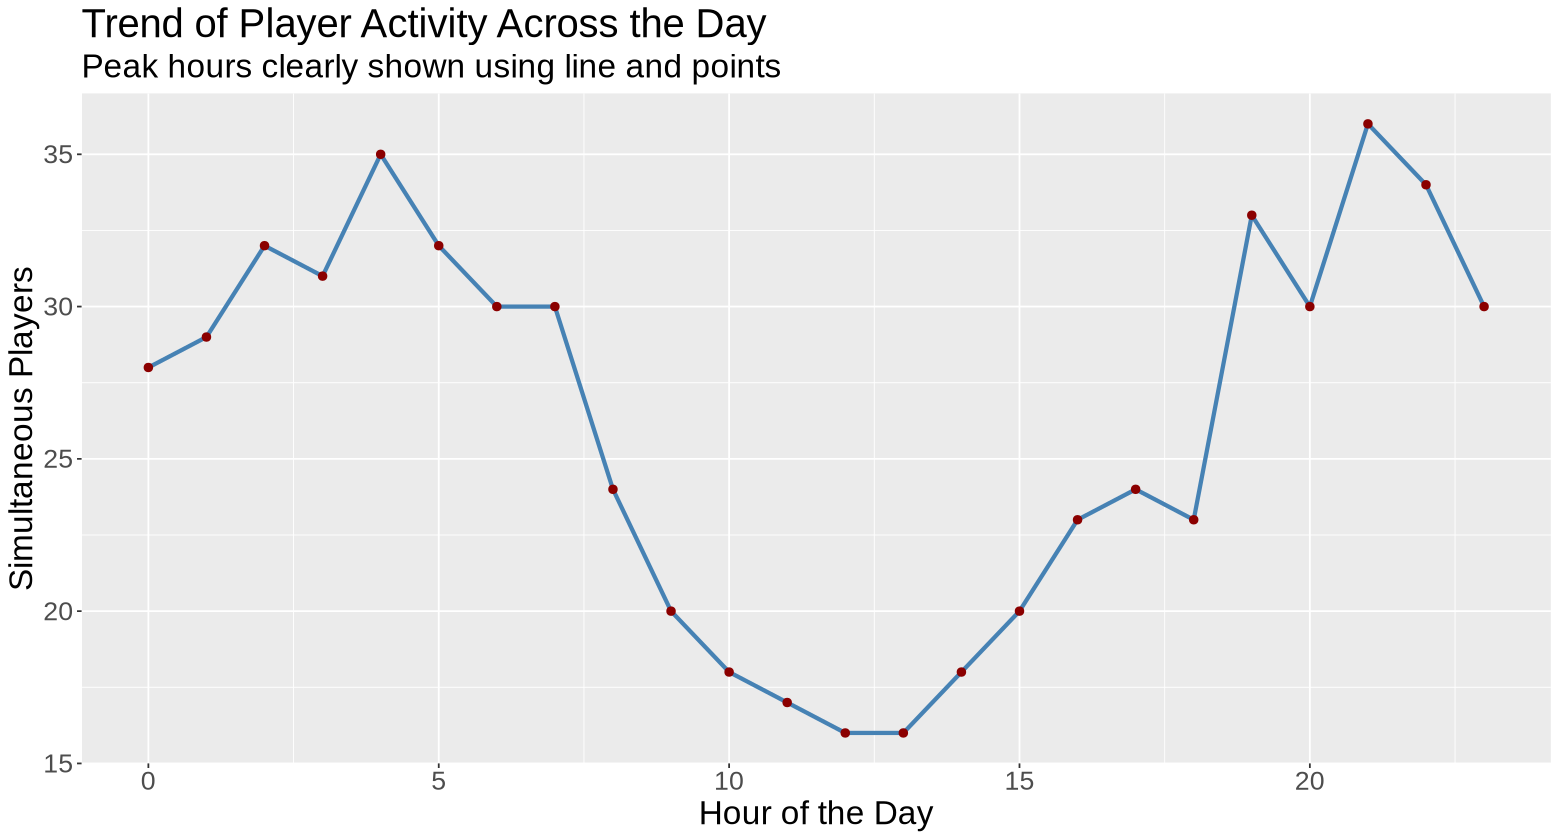

In [135]:
options(repr.plot.width = 13, repr.plot.height = 7) 
ggplot(hourly_players, aes(x = hour, y = players)) +
  geom_line(color = "steelblue", size = 1.2) +
  geom_point(color = "darkred", size = 2) +
  labs(
    x = "Hour of the Day",
    y = "Simultaneous Players",
    title = "Trend of Player Activity Across the Day",
    subtitle = "Peak hours clearly shown using line and points"
  ) +
theme(text = element_text(size = 20))

Inference:
